In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [4]:
filepath = r"C:\Users\asunday\Downloads\white wine quality.csv"

df = pd.read_csv(filepath, sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


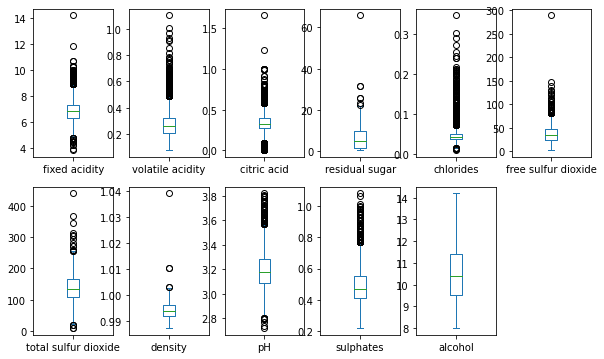

In [7]:
var = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df[var].plot(
    kind = 'box',
    subplots = True,
    figsize = (10, 6),
    layout = (2, 6)
);

In [8]:
# split into X and y

X = df.drop('quality', axis = 1)
# encode y to 1 and 0 based on the content of the quality field
y = df['quality'].apply(lambda x: 1 if x > 6 else 0)

<AxesSubplot:>

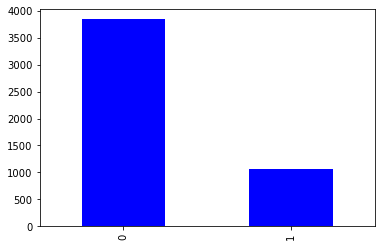

In [10]:
# check for imbalance in the data

y.value_counts().plot(
    kind = 'bar',
    color = 'blue'
)

In [11]:
smote = SMOTE(sampling_strategy = 'auto', random_state = 42)

X_res, y_res = smote.fit_resample(X, y)

<AxesSubplot:>

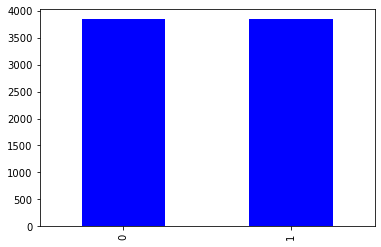

In [12]:
y_res.value_counts().plot(
    kind = 'bar',
    color = 'blue'
)

In [13]:
 # Split the resampled data into training and testing sets
    
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [14]:
# CREATE MODEL INSTANCE
rfc = RandomForestClassifier()
lr = LogisticRegression()
svc = SVC()

###### Random Forest

In [15]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_pred_rfc = rfc.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

Accuracy: 0.91
Precision: 0.89
Recall: 0.93
F1 Score: 0.91


###### Logistic regression

In [18]:
lr.fit(X_train, y_train)

C:\Users\asunday\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred_lr = lr.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1 Score: 0.73


###### SVC

In [21]:
svc.fit(X_train, y_train)

SVC()

In [22]:
y_pred_svc = svc.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

Accuracy: 0.69
Precision: 0.68
Recall: 0.74
F1 Score: 0.71


In [24]:
comparison_df = pd.DataFrame(
    {
        'Models': [
            'Random Forest Classifier',
            'Logistic Regression',
            'Support Vector Classifier'
        ],
        
        'Accuracy': [
            accuracy_score(y_test, y_pred_rfc),
            accuracy_score(y_test, y_pred_lr),
            accuracy_score(y_test, y_pred_svc)
        ],
        
        'Precision': [
            precision_score(y_test, y_pred_rfc),
            precision_score(y_test, y_pred_lr),
            precision_score(y_test, y_pred_svc)
        ],
        
        'Recall': [
            recall_score(y_test, y_pred_rfc),
            recall_score(y_test, y_pred_lr),
            recall_score(y_test, y_pred_svc)
        ], 
        
        'F1 score': [
            f1_score(y_test, y_pred_rfc),
            f1_score(y_test, y_pred_lr),
            f1_score(y_test, y_pred_svc)
        ]
    }
)

In [25]:
comparison_df

,Models,Accuracy,Precision,Recall,F1 score
0,Random Forest Classifier,0.908854,0.891656,0.931079,0.910941
1,Logistic Regression,0.730469,0.730819,0.730819,0.730819
2,Support Vector Classifier,0.692708,0.676157,0.741222,0.707196
